<a href="https://colab.research.google.com/github/denistoo749/Malaria-Cell-Image-Classification/blob/main/malaria_cell_images_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Malaria Cell Image Classification using `TensorFlow Datasets`
You can find a dataset to use by exploring the large catalog of easy-to-download datasets at TensorFlow Datasets.

## Setup

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

Download the cell images dataset using TensorFlow Datasets:

In [16]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'malaria',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

malaria dataset's classes

In [17]:
num_classes = metadata.features['label'].num_classes
print(num_classes)

2


Define some parameters for the loader:

In [18]:
batch_size = 32
img_height = 180
img_width = 180

AUTOTUNE = tf.data.AUTOTUNE

# Configure dataset for performance
To train a model with this dataset you will want the data:

To be well shuffled.
To be batched.
Batches to be available as soon as possible.

In [19]:
def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

# train_ds = configure_for_performance(train_ds)
# val_ds = configure_for_performance(val_ds)

Retrieve an image from the dataset:

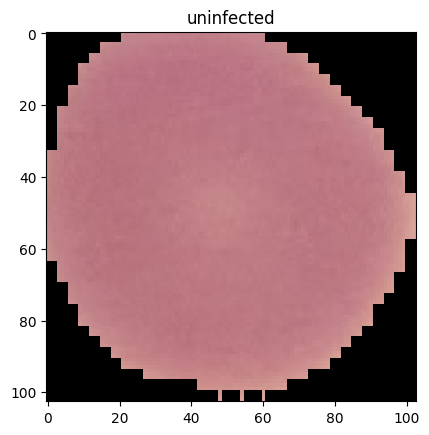

In [20]:
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

batch, shuffle, and configure the training, validation, and test sets for performance:

In [22]:
train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)
test_ds = configure_for_performance(test_ds)

In [23]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, None), dtype=tf.int64, name=None))>